In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

Using TensorFlow backend.


## Utility functions used in the notebook

In [2]:
def rbm_gibbs_sample_image(rbm, im, steps):
  assert len(im.shape) < 3
  if len(im.shape) == 2:
    rows = im.shape[0]
    cols = im.shape[1]
    im = im.reshape((-1))
  else:
    im = im.copy()
  for _ in range(steps):
    im = rbm.gibbs(im)
  if rows is not None and cols is not None:
    im = im.reshape((rows, cols))
  return im.astype('float32')
    
def image_palette(X, nr = 0, m = 20):
  if nr is 0:
    nr = X.shape[0]
  return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
  X = X.copy()
  if len(X.shape) == 2:
    X[start:end] = 0
  elif len(X.shape) == 3:
    X[:,start:end] = 0
  return X

## Load and show the mnist data

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

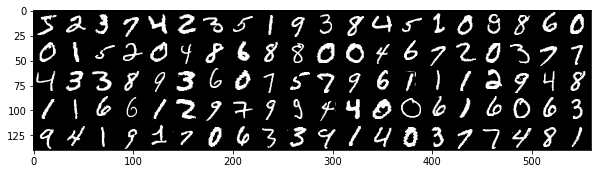

In [4]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)

## Train the RBM
**Exercise** What is the effect of the different parameters: **n_components**, **learning_rate**, **n_iter**. These parameters are, respectively, the number of components, the learning rate and the number of iterations. <br/>
Evaluate the performance visually in the next code cell.


In [5]:
rbm1 = BernoulliRBM(n_components=10, learning_rate=0.01, random_state=0, n_iter=10, verbose=True)
rbm1.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 3.19s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 3.68s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 3.72s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 3.45s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 3.58s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.95, time = 3.77s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.56, time = 3.64s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.83, time = 3.74s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -186.91, time = 3.53s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -186.68, time = 3.70s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=10, n_iter=10,
       random_state=0, verbose=True)

In [6]:
rbm2 = BernoulliRBM(n_components=10, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm2.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 3.27s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 3.69s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 3.80s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 3.39s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 3.39s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.95, time = 3.35s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.56, time = 3.37s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.83, time = 3.33s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -186.91, time = 3.37s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -186.68, time = 3.37s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -186.66, time = 3.37s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -186.75, time = 3.38s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -186.59, time = 3.37s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -186.67, time = 3.38s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=10, n_iter=20,
       random_state=0, verbose=True)

In [13]:
rbm3 = BernoulliRBM(n_components=10, learning_rate=0.06, random_state=0, n_iter=10, verbose=True)
rbm3.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -204.74, time = 3.16s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -204.48, time = 3.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -195.90, time = 3.28s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.12, time = 3.28s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -194.36, time = 3.28s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -195.77, time = 3.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -186.32, time = 3.28s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -185.06, time = 3.28s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.62, time = 3.28s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.26, time = 3.28s


BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=10, n_iter=10,
       random_state=0, verbose=True)

In [8]:
rbm4 = BernoulliRBM(n_components=10, learning_rate=0.06, random_state=0, n_iter=20, verbose=True)
rbm4.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -204.74, time = 3.05s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -204.48, time = 3.40s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -195.90, time = 3.38s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.12, time = 3.36s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -194.36, time = 3.38s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -195.77, time = 3.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -186.32, time = 3.38s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -185.06, time = 3.35s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.62, time = 3.32s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.26, time = 3.34s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -187.07, time = 3.35s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -186.10, time = 3.34s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -186.97, time = 3.35s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -189.01, time = 3.32s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=10, n_iter=20,
       random_state=0, verbose=True)

In [9]:
rbm5 = BernoulliRBM(n_components=20, learning_rate=0.01, random_state=0, n_iter=10, verbose=True)
rbm5.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -198.55, time = 3.74s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -190.71, time = 3.87s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -183.02, time = 3.89s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -171.34, time = 3.87s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -168.11, time = 3.82s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -167.60, time = 3.82s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -160.58, time = 3.82s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -154.32, time = 3.83s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -150.21, time = 3.82s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -146.39, time = 3.82s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=20, n_iter=10,
       random_state=0, verbose=True)

In [10]:
rbm6 = BernoulliRBM(n_components=20, learning_rate=0.01, random_state=0, n_iter=20, verbose=True)
rbm6.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -198.55, time = 3.49s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -190.71, time = 3.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -183.02, time = 3.83s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -171.34, time = 4.12s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -168.11, time = 4.13s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -167.60, time = 4.05s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -160.58, time = 3.88s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -154.32, time = 3.86s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -150.21, time = 3.97s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -146.39, time = 3.82s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -144.90, time = 3.82s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -144.31, time = 3.82s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -143.73, time = 3.83s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -142.44, time = 3.82s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=20, n_iter=20,
       random_state=0, verbose=True)

In [5]:
rbm7 = BernoulliRBM(n_components=20, learning_rate=0.06, random_state=0, n_iter=10, verbose=True)
rbm7.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -175.96, time = 3.36s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -158.70, time = 3.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -150.27, time = 3.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -146.53, time = 3.74s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -141.35, time = 3.83s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -133.27, time = 3.77s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -132.15, time = 4.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -132.28, time = 3.93s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -127.90, time = 3.84s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -128.93, time = 3.91s


BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=20, n_iter=10,
       random_state=0, verbose=True)

In [28]:
rbm8 = BernoulliRBM(n_components=20, learning_rate=0.06, random_state=0, n_iter=20, verbose=True)
rbm8.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -175.96, time = 3.69s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -158.70, time = 3.79s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -150.27, time = 3.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -146.53, time = 3.76s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -141.35, time = 3.74s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -133.27, time = 3.74s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -132.15, time = 4.04s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -132.28, time = 3.98s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -127.90, time = 3.76s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -128.93, time = 3.72s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -130.13, time = 3.72s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -128.90, time = 3.74s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -127.52, time = 3.72s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -127.55, time = 3.72s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=20, n_iter=20,
       random_state=0, verbose=True)

## Sample the trained RBM and show the result
The gibbs_steps variable determines how many Gibbs sampling steps will be performed for each test image i.e. with the test images as initialization. <br/>
**Exercise** Try different values and observe the result. Can you explain the result? <br/>
Compare the result with the original test images, shown one cell lower.


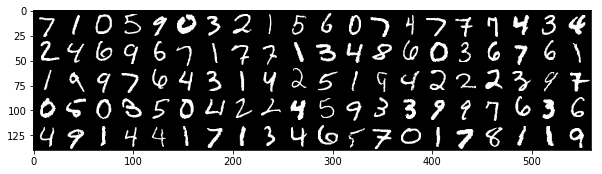

In [29]:
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test))

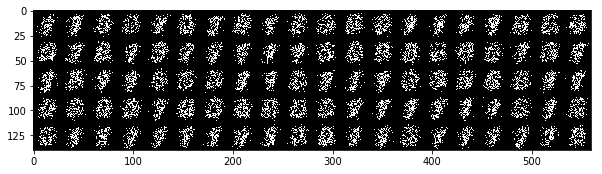

In [30]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm1.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

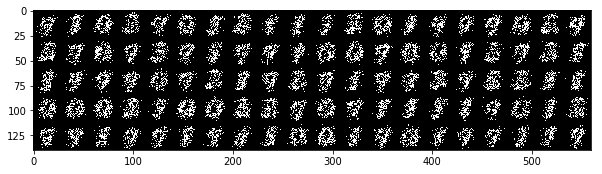

In [31]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm2.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

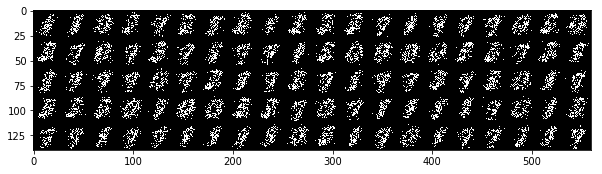

In [14]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm3.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

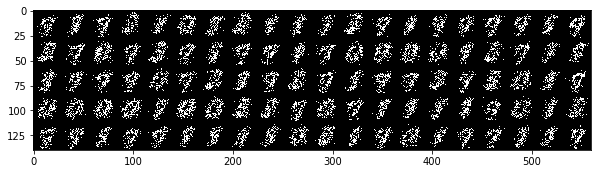

In [33]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm4.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

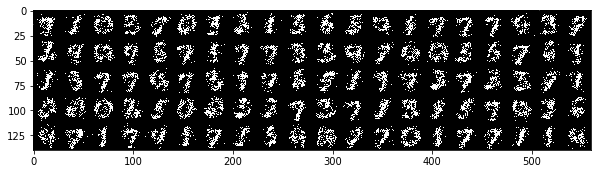

In [34]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm5.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

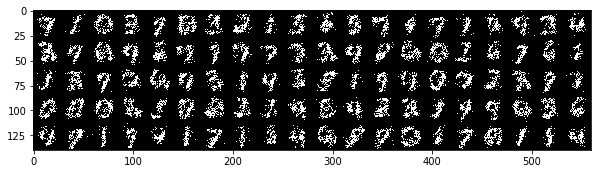

In [35]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm6.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

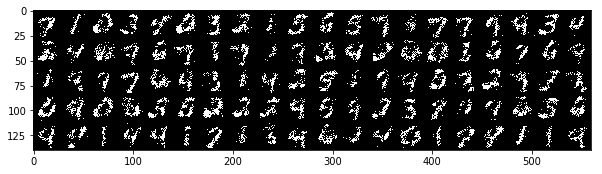

In [36]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm7.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

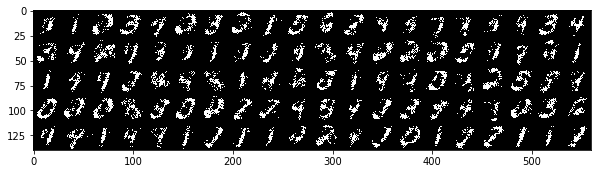

In [37]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm8.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

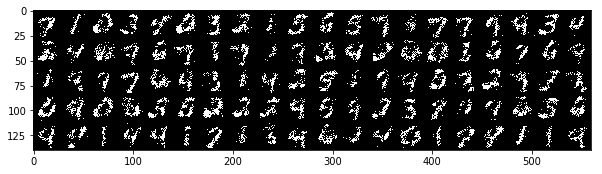

In [6]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm7.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

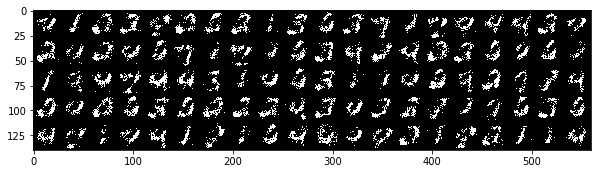

In [9]:
gibbs_steps = 100
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm7.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

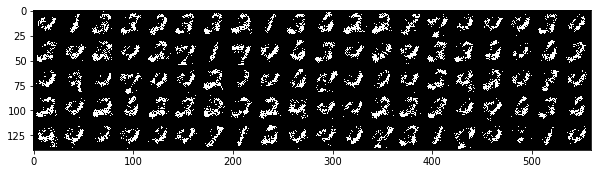

In [10]:
gibbs_steps = 1000
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm7.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

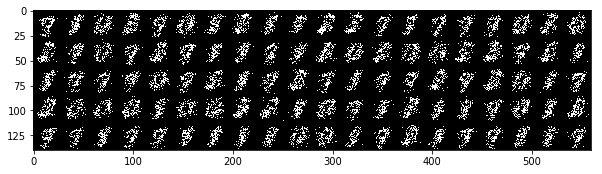

In [15]:
gibbs_steps = 10
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm3.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

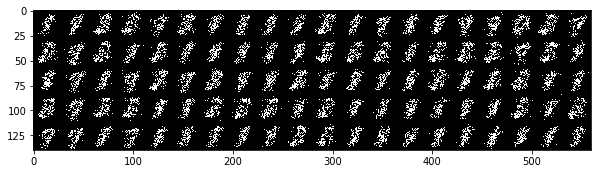

In [16]:
gibbs_steps = 100
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm3.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

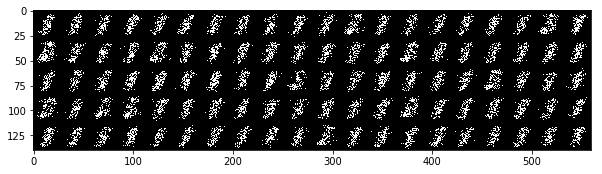

In [17]:
gibbs_steps = 1000
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm3.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))

## Reconstruction of unseen images
In this cell, we will remove pixel rows from certain images. Using the recently trained RBM, we will then try to reconstruct the original images.  <br/>
The following variables control this process: <br/>


*   **reconstruction_gibbs_steps**: The number of gibbs steps used to reconstruct the image.
*   **start_test_index**: The first index of the test set to use.
*   **nr**: the number of images starting from **start_test_index** to reconstruct.
*   **start_row_to_remove**:  The index of the first row that should be removed.
*   **end_row_to_remove**: The index up to which the rows should be removed.

**Exercise** Adjust these variables and observe the result of the reconstruction in the shown image.
What is the role of the previously seen RBM hyperparameters on the reconstruction? <br/>
How many rows can you remove such that reconstruction is still possible? <br/>
In the next code cell, the removed rows will be replaced by the reconstructed rows.




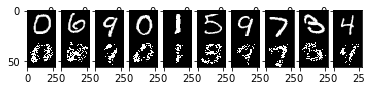

In [52]:
reconstruction_gibbs_steps = 10
start_test_index = 10
nr = 10
start_row_to_remove = 0
end_row_to_remove = 0

to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)

for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm7, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

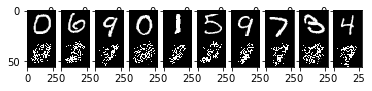

In [53]:
reconstruction_gibbs_steps = 10
start_test_index = 10
nr = 10
start_row_to_remove = 2
end_row_to_remove = 3

to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)

for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm3, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

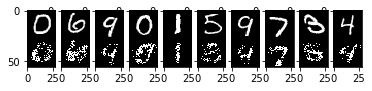

In [54]:
reconstruction_gibbs_steps = 10
start_test_index = 10
nr = 10
start_row_to_remove = 2
end_row_to_remove = 3

to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)

for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm7, to_reconstruct[i], reconstruction_gibbs_steps)
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()

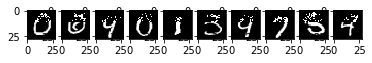

In [40]:
start_row_to_remove
end_row_to_remove
to_reconstruct[:,start_row_to_remove:end_row_to_remove] = reconstructed[:,start_row_to_remove:end_row_to_remove]
fig = plt.figure()
for i in range(nr): 
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(to_reconstruct[i])

plt.show()

## Component visualisation
In the final cell, the components (weights of each neuron) of the RBM are shown.<br/> 
Observing these components (think back to CNNs) may offer insights into the trained model.

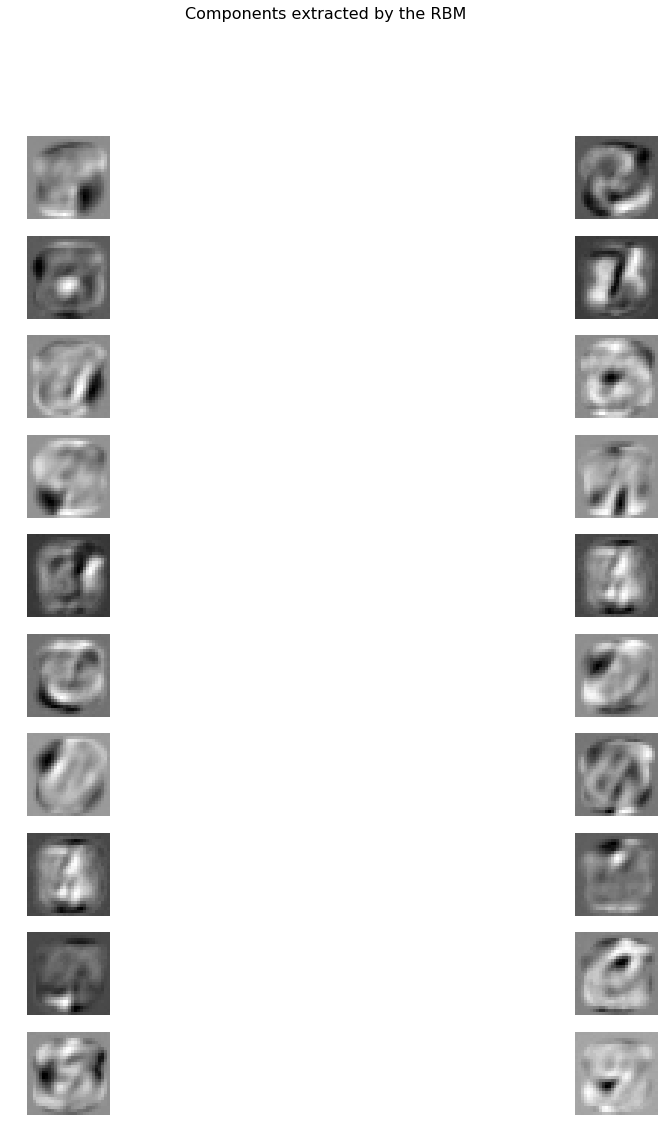

In [60]:
plt.figure(figsize=(18, 18))
nr_components = rbm7.components_.shape[0]
for i in range(nr_components):
    c = rbm7.components_[i]
    plt.subplot(10, np.ceil(nr_components/10), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);

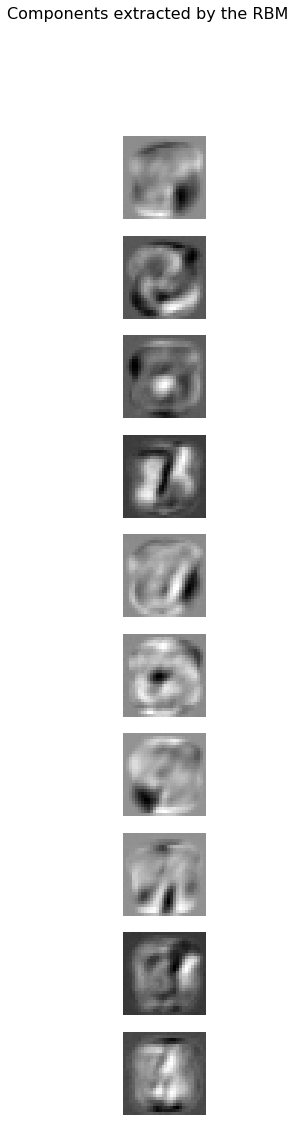

In [61]:
plt.figure(figsize=(18, 18))
nr_components = rbm3.components_.shape[0]
for i in range(nr_components):
    c = rbm7.components_[i]
    plt.subplot(10, np.ceil(nr_components/10), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);